In [1]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

# Numpy

## Коэффициент корреляции Пирсона

In [3]:
def corrcoef(v1, v2):
    v_1 = v1 - np.mean(v1)
    v_2 = v2 - np.mean(v2)
    
    return np.sum(v_1 * v_2)/(np.sum(v_1*v_1) * np.sum(v_2*v_2))**(0.5)

In [3]:
# Test 1
v1 = np.random.rand(100)
v2 = np.random.rand(100)
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

In [4]:
# Test 2
v1 = np.array([1, 2, 3])
v2 = np.array([1, 2, 3])
print(v1 @ v2)
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

14


In [5]:
# Test 3
v1 = np.random.normal(loc=0, scale=1, size=100)
v2 = v1 + 0.2 * np.random.rand(100)
assert np.corrcoef(v1, v2)[0][1].round(8) == corrcoef(v1, v2).round(8)

## IsNa

In [6]:
def isna(x):
    return ~(x < np.inf)

In [7]:
# Test 1

a = np.ones(10)
a[0] = np.nan
a[1] = None

assert (isna(a) == np.isnan(a)).all()

In [8]:
# Test 1

a = np.ones(10)
a[0] = np.nan
a[1] = None

assert (isna(a) == np.isnan(a)).all()

## dist

In [9]:
def dist(v1, v2):
    return np.sum((v1 - v2)**2)**(.5)

In [10]:
# Test 1
v1 = np.array([0, 0, 1])
v2 = np.array([0, 0, 0])

assert dist(v1, v2).round(8) == np.linalg.norm(v1-v2).round(8)

In [11]:
# Test 2
v1 = np.array([2, 3, 1])
v2 = np.array([0, 0, 0])

assert dist(v1, v2).round(8) == np.linalg.norm(v1-v2).round(8)

In [12]:
# Test 3
v1 = np.random.rand(100)
v2 = np.random.rand(100)

assert dist(v1, v2).round(8) == np.linalg.norm(v1-v2).round(8)

# Pands

In [13]:
df = pd.read_csv('./train.csv')

## Построить 3 scatter графика зависимости SalePrice от какой-нибудь числовой колонки


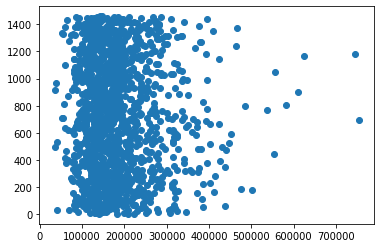

In [14]:
plt.scatter(df['SalePrice'], df['Id'])

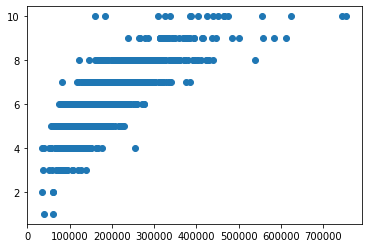

In [15]:
plt.scatter(df['SalePrice'], df['OverallQual'])

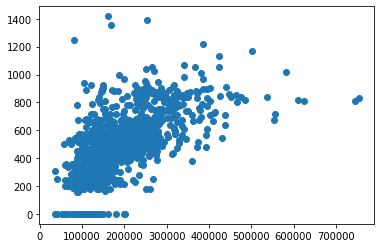

In [16]:
plt.scatter(df['SalePrice'], df['GarageArea'])

## Для 3 других числовых колонок построить гистаграммы распределения

<AxesSubplot:>

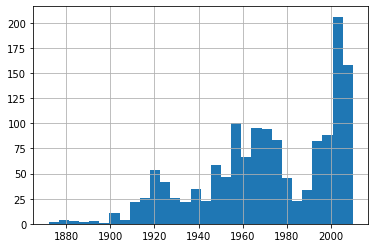

In [17]:
df['YearBuilt'].hist(bins=30)

<AxesSubplot:>

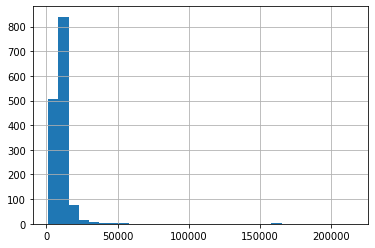

In [18]:
df['LotArea'].hist(bins=30)

<AxesSubplot:>

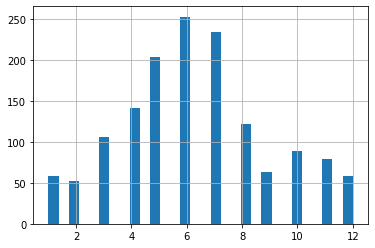

In [19]:
df['MoSold'].hist(bins=30)

## Посчитать среднюю цену дома с бассеином и без (PoolArea > 0 -> есть бассеин)

In [20]:
df[df['PoolArea'] > 0]['SalePrice'].mean()

288138.5714285714

## Для 3 категориальных колонок вывести их распределение по категориям

In [21]:
def info_for_categ_plot(arr):
    # Смотрим количество элементов каждой категории
    y = [arr[arr == i].shape[0] for i in arr.unique()]
    # Если есть категория nan
    if(np.nan in list(arr.unique())):
    # По найденному индексу записываем количество nan
        y[list(arr.unique()).index(np.nan)] = arr[arr.isna()].shape[0]
    return arr.unique(), y

# print(info_for_categ_plot(df['BsmtCond']))

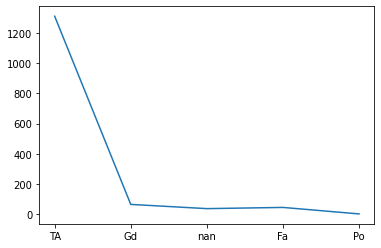

In [22]:
collumn_name = 'BsmtCond'

plot_info = info_for_categ_plot(df[collumn_name])
# Переименование оси Х
plt.xticks(range(len(plot_info[0])), plot_info[0])

plt.plot(range(len(plot_info[0])), plot_info[1])

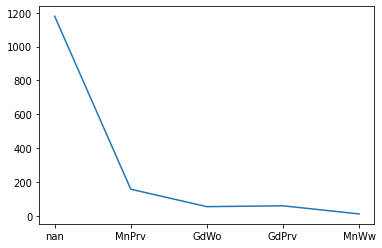

In [23]:
collumn_name = 'Fence'

plot_info = info_for_categ_plot(df[collumn_name])
plt.xticks(range(len(plot_info[0])), plot_info[0])

plt.plot(range(len(plot_info[0])), plot_info[1])

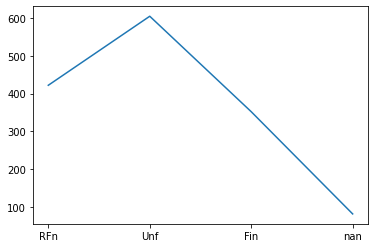

In [24]:
collumn_name = 'GarageFinish'

plot_info = info_for_categ_plot(df[collumn_name])
plt.xticks(range(len(plot_info[0])), plot_info[0])

plt.plot(range(len(plot_info[0])), plot_info[1])

# Scikit-learn

In [18]:
wine_data = load_wine()

wine_df = pd.DataFrame.from_records(wine_data['data'], columns = wine_data['feature_names'])
wine_df['target'] = wine_data['target_names'][wine_data['target']]
wine_df['color'] = wine_df['target'].apply(lambda x: {'class_0':'r', 'class_1':'g', 'class_2':'b'}[x])

In [19]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [20]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,color
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,r
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,r
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,r
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,r
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,r


In [21]:
wine_df['target'].unique()

array(['class_0', 'class_1', 'class_2'], dtype=object)

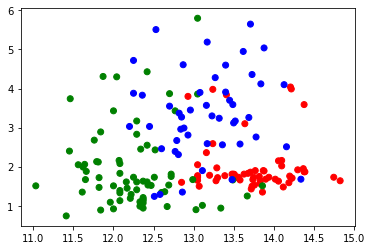

In [22]:
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], c = wine_df['color'])

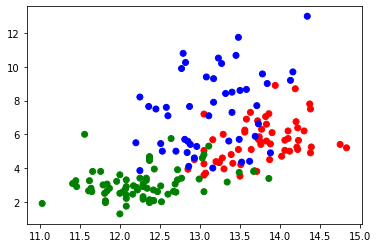

In [23]:
plt.scatter(wine_df['alcohol'], wine_df['color_intensity'], c = wine_df['color'])

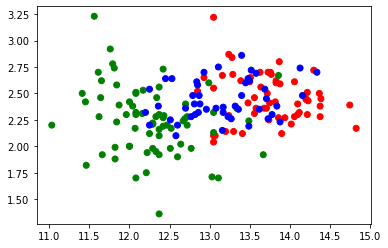

In [26]:
plt.scatter(wine_df['alcohol'], wine_df['ash'], c = wine_df['color'])